# Author : Deepak Biswakarma

### Data Science and Business Analytics intern at The Spark Foundation.

### Exploratory Data Analysis - Retail

## Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [2]:
superstore_df = pd.read_csv("SampleSuperstore.csv")

In [3]:
# To see all the Columns and Rows in the dataset
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

## Exploratory Data Analysis

In [4]:
# View the first 5 rows of our dataset
superstore_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
# View the shape of the DataFrame
print("There are {} rows".format(superstore_df.shape[0]))
print("There are {} columns".format(superstore_df.shape[1]))

There are 9994 rows
There are 13 columns


In [6]:
# View all the columns in the DataFrame
superstore_df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
# View the information
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
# To check if there are null values in the DataFrame
superstore_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
# View the states in the DataFrame
print("There are {} different states\n".format(len(superstore_df["State"].unique())))
print(superstore_df["State"].unique())

There are 49 different states

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


In [10]:
# View the unique categories in the DataFrame
print(superstore_df["Category"].unique())

['Furniture' 'Office Supplies' 'Technology']


In [11]:
# View how many Sub-Categories are there in the DataFrame
print("Categories are divided into {} subcategories\n".format(len(superstore_df["Sub-Category"].unique())))
print(superstore_df["Sub-Category"].unique())

Categories are divided into 17 subcategories

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [12]:
# View how many segment types are there in the DataFrame
superstore_df["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [13]:
# View the statistical description of the DataFrame
superstore_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Creating Loss DataFrame

In [14]:
loss_df = superstore_df[superstore_df["Profit"] < 0]

In [15]:
# View the first 5 rows of loss df
loss_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522


In [16]:
# View the shape of the loss df 
print("There are {} rows".format(loss_df.shape[0]))
print("There are {} columns".format(loss_df.shape[1]))

There are 1871 rows
There are 13 columns


In [17]:
# View the statistical description of the loss df
loss_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000
mean,55991.122929,250.511574,3.762694,0.480887,-83.448042
std,26041.501999,715.067296,2.141347,0.235080,284.423422
min,1841.000000,0.444000,1.000000,0.100000,-6599.978000
25%,33024.000000,12.503000,2.000000,0.200000,-58.660950
50%,60623.000000,71.088000,3.000000,0.400000,-18.088200
75%,77095.000000,284.922000,5.000000,0.700000,-6.261500
max,98198.000000,22638.480000,14.000000,0.800000,-0.089500


In [18]:
Total_loss = np.negative(loss_df["Profit"].sum())
print("Total loss = %.2f" %Total_loss)

Total loss = 156131.29


In [19]:
loss_df.groupby(by = "Segment").sum()

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,57202260,247196.2460,3651,476.76,-84945.7112
Corporate,30034273,131860.5383,2191,272.00,-44787.2076
Home Office,17522858,89650.3705,1198,150.98,-26398.3669


In [20]:
loss_df.groupby(by = "Sub-Category").sum()

,Postal Code,Sales,Quantity,Discount,Profit
Sub-Category,,,,,
Accessories,5286382,10958.8000,330,18.20,-930.6265
Appliances,4825871,3382.5340,235,53.60,-8629.6412
Binders,32609300,36140.6130,2456,452.40,-38510.4964
Bookcases,6423506,48072.7408,422,37.99,-12152.2060
Chairs,15008025,91988.4560,876,61.40,-9880.8413
Fasteners,701930,149.2800,55,2.40,-33.1952
Furnishings,10970913,12845.8440,597,88.60,-6490.9134
Machines,2236261,72456.2530,157,25.60,-30118.6682
Phones,6105294,35797.8400,476,46.60,-7530.6235


In [21]:
print("There are {} Sub-Categories" .format(len(loss_df["Sub-Category"].unique())))
loss_df["Sub-Category"].value_counts()

There are 12 Sub-Categories


Binders        613
Chairs         235
Tables         203
Furnishings    167
Storage        161
Phones         136
Bookcases      109
Accessories     91
Appliances      67
Machines        44
Supplies        33
Fasteners       12
Name: Sub-Category, dtype: int64

In [22]:
loss_df.groupby(by = "City").sum().sort_values("Profit",ascending=True).head(10)

,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,
Philadelphia,4783713,70460.5510,892,115.30,-19590.7411
Houston,14256474,37640.7304,683,104.14,-14785.3668
Chicago,9397492,19910.0120,541,88.20,-11120.6271
San Antonio,2580831,17395.1450,139,17.10,-7831.0254
Lancaster,683904,7699.2420,71,9.40,-7632.4946
Burlington,108868,12044.8740,19,2.00,-5999.3318
Dallas,5487794,9994.0562,280,39.30,-4208.5218
Jacksonville,1237176,31146.2710,154,18.85,-4059.9857
New York City,400828,19533.8020,132,12.20,-3966.0226


In [23]:
loss_df.sort_values(["Sales"], ascending=True).groupby(by = "Category").mean()

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,59700.907563,361.184295,3.714286,0.367143,-85.344690
Office Supplies,54746.056433,103.395796,3.865688,0.617607,-63.899840
Technology,50287.590406,439.899974,3.553506,0.333579,-142.361322


In [24]:
superstore_df.groupby(["State"]).sum()["Sales"].nsmallest(10)

State
North Dakota             919.910
West Virginia           1209.824
Maine                   1270.530
South Dakota            1315.560
Wyoming                 1603.136
District of Columbia    2865.020
Kansas                  2914.310
Idaho                   4382.486
Iowa                    4579.760
New Mexico              4783.522
Name: Sales, dtype: float64

In [25]:
superstore_df.sort_values(["Segment"], ascending=True).groupby("Segment").sum()

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,288878609,1.161401e+06,19521,820.91,134119.2092
Corporate,164536330,7.061464e+05,11608,477.85,91979.1340
Home Office,98157713,4.296531e+05,6744,262.33,60298.6785


In [26]:
superstore_df.groupby("Region").sum()

,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
Central,151786150,501239.8908,8780,558.34,39706.3625
East,50171698,678781.2400,10618,414.00,91522.7800
South,55875052,391721.9050,6209,238.55,46749.4303
West,293739752,725457.8245,12266,350.20,108418.4489


## Visualizations

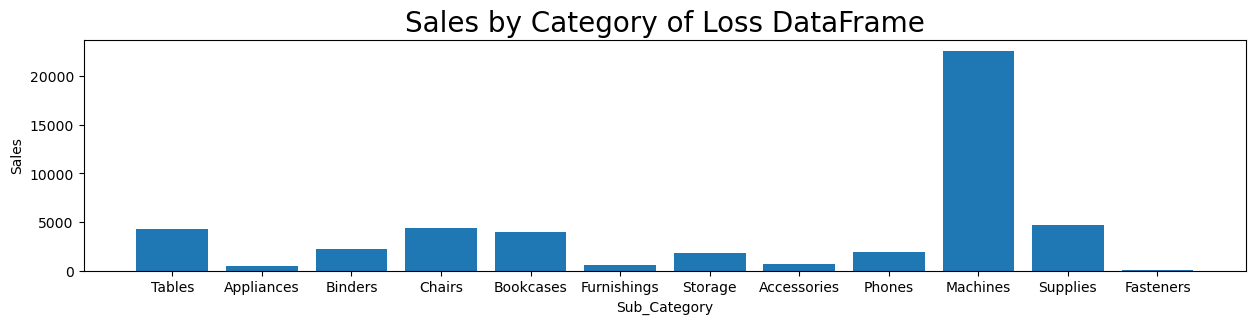

In [27]:
plt.figure(figsize = (15,3))
plt.title("Sales by Category of Loss DataFrame", fontsize = 20)
plt.bar(loss_df["Sub-Category"], loss_df["Sales"])
plt.xlabel("Sub_Category")
plt.ylabel("Sales")
plt.show()

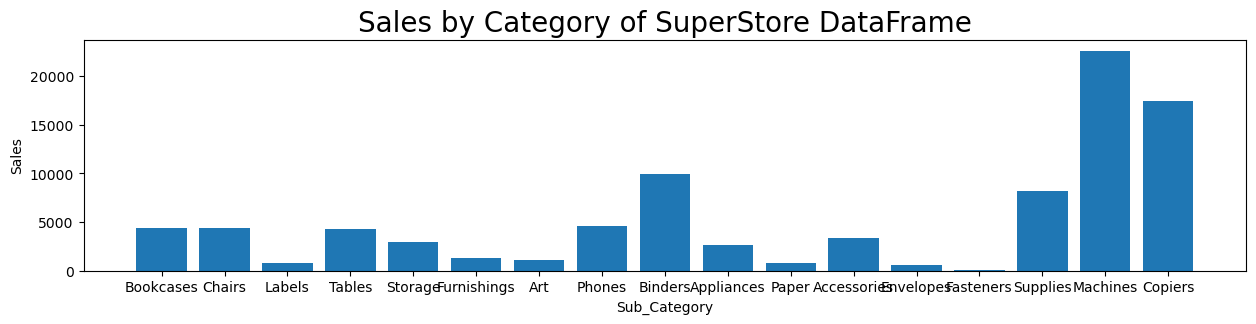

In [28]:
plt.figure(figsize = (15,3))
plt.title("Sales by Category of SuperStore DataFrame", fontsize = 20)
plt.bar(superstore_df["Sub-Category"], superstore_df["Sales"])
plt.xlabel("Sub_Category")
plt.ylabel("Sales")
plt.show()

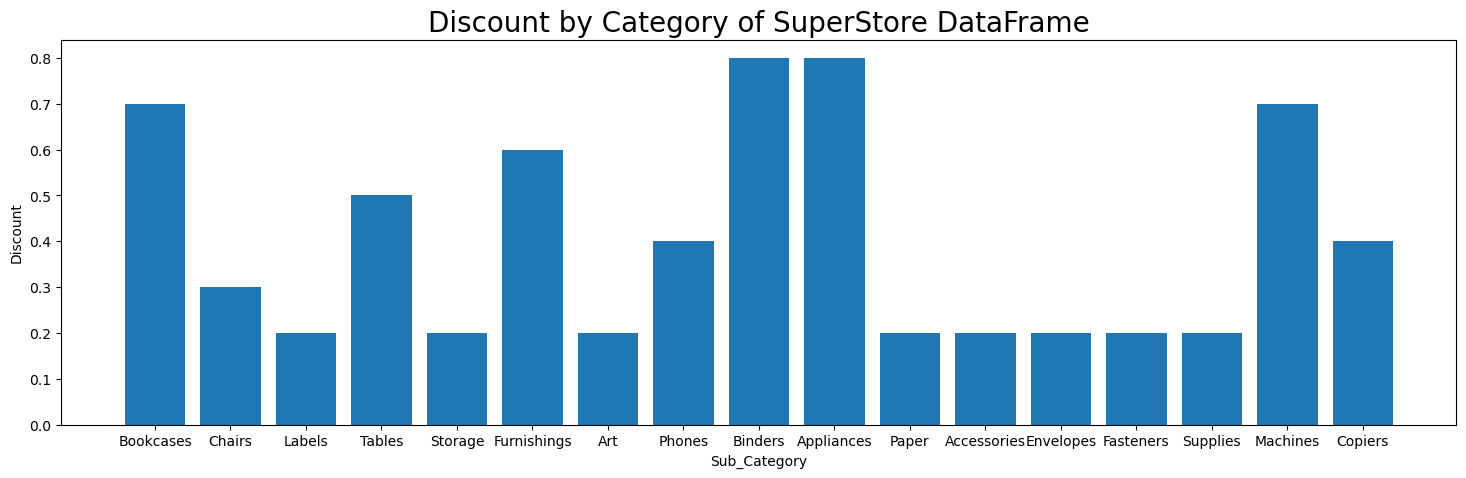

In [29]:
plt.figure(figsize = (18,5))
plt.title("Discount by Category of SuperStore DataFrame", fontsize = 20)
plt.bar(superstore_df["Sub-Category"], superstore_df["Discount"])
plt.xlabel("Sub_Category")
plt.ylabel("Discount")
plt.show()

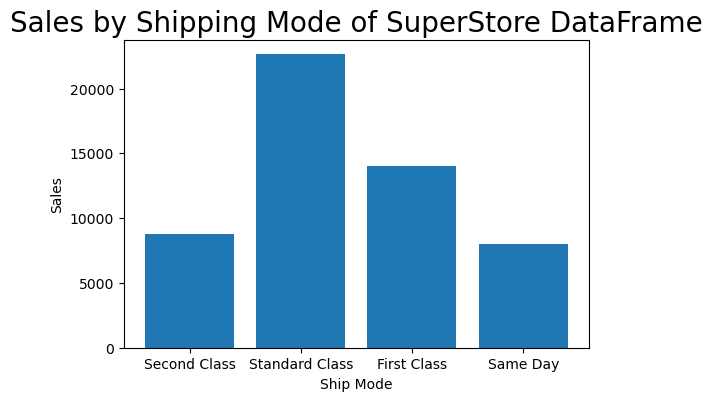

In [30]:
plt.figure(figsize = (6,4))
plt.title("Sales by Shipping Mode of SuperStore DataFrame", fontsize = 20)
plt.bar(superstore_df["Ship Mode"], superstore_df["Sales"])
plt.xlabel("Ship Mode")
plt.ylabel("Sales")
plt.show()

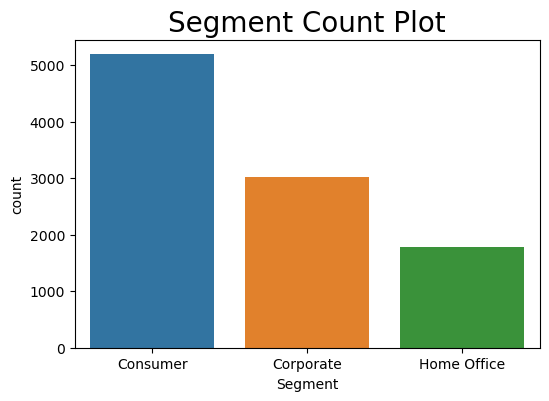

In [31]:
plt.figure(figsize = (6,4))
plt.title("Segment Count Plot", fontsize = 20)
sns.countplot(x = superstore_df.Segment)
plt.show()

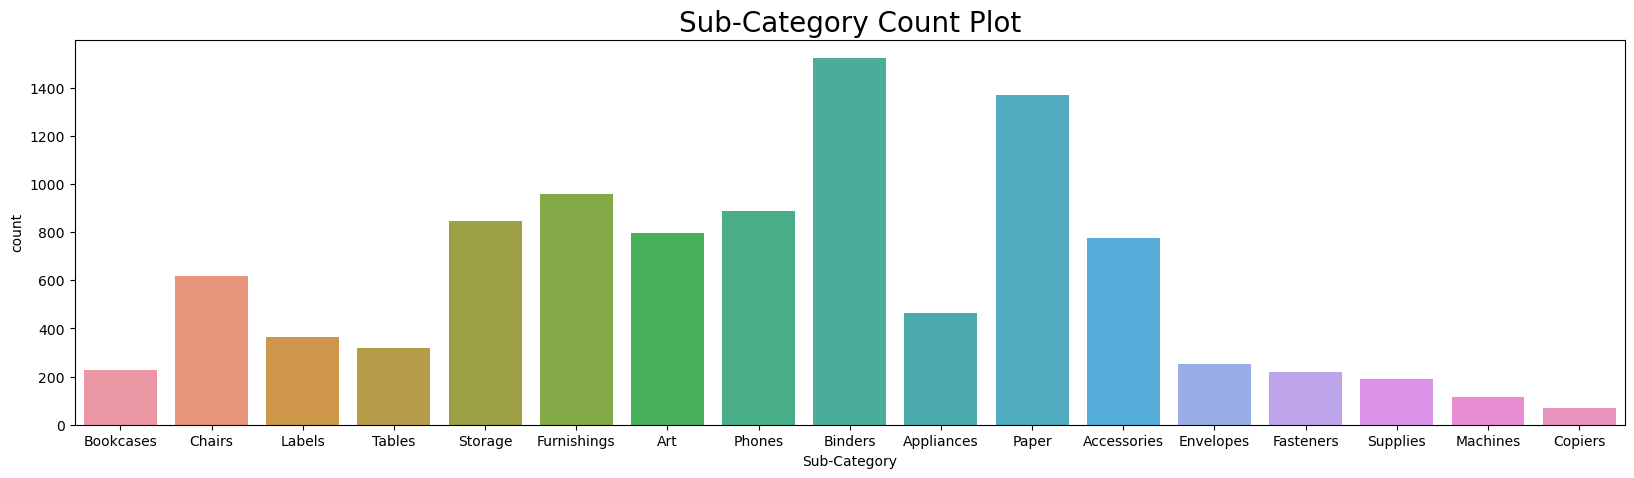

In [32]:
plt.figure(figsize = (20,5))
plt.title("Sub-Category Count Plot", fontsize = 20)
sns.countplot(x = "Sub-Category", data=superstore_df)
plt.show()

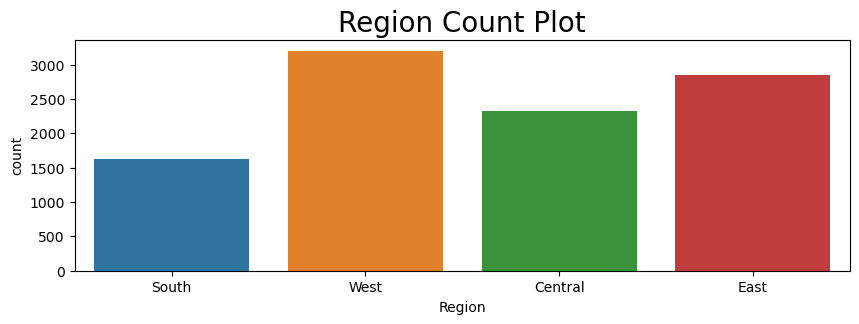

In [33]:
plt.figure(figsize = (10,3))
plt.title("Region Count Plot", fontsize = 20)
sns.countplot(x = "Region", data=superstore_df)
plt.show()

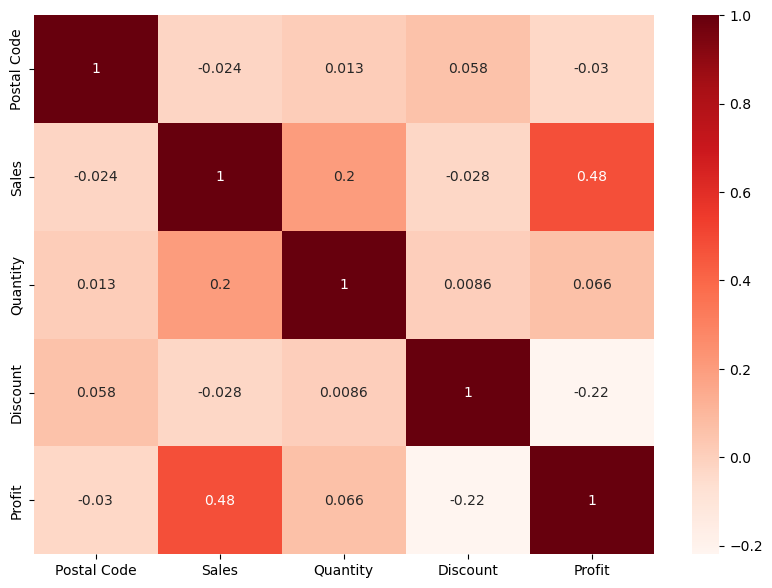

In [34]:
superstore_df.corr()
plt.figure(figsize= (10,7))
sns.heatmap(superstore_df.corr(), cmap="Reds", annot=True)
plt.show()

### Analysis from the Heatmap
* Sales and Profit are Moderately Correlated.
* Discount and Profit are Negatively Correlated.

### Overall Analysis
* The main reason which leads to loss is Discount as if some ares lead to loss due to more         discounts, and some areas leads to fewer Sales due to fewer discounts, hence it needs to be     improved.
* It is better to give more discounts during festival seasons, additionally, that will result in   more sales.
* The Home office Segment need better improvement.
* Some cities have fewer Sales, lack of awerness can be the reason for this, hence advertising     in those cities might help in more sales.